## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 和 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [3]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [5]:
df_train = pd.read_csv("Titanic_train.csv")

In [14]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


In [19]:
# 細看遺失資料的樣態
missing_index=data.isnull()
display(data[missing_index.values==True])

,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
...,...,...,...
859,1,NaN,2
863,0,NaN,2
868,1,NaN,2
878,1,NaN,2


## 觀察 Age

29.69911764705882
14.526497332334042


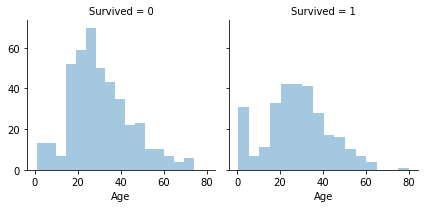

In [20]:
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

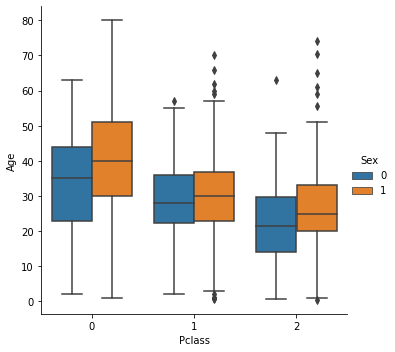

In [21]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")
#男生女生的身高特性有差異
# 觀察到不同艙等的年紀不太相同

## 我們適著用 Pclass和 Sex 來透過 KNN 來補值

In [23]:
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.

le = preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])

df_train['Sex']=le.fit_transform(df_train['Sex'])

data=df_train[['Sex','Age','Pclass']]
# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))
#只呈現有遺失值的資料
display(data[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])


,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
...,...,...,...
859,1,NaN,2
863,0,NaN,2
868,1,NaN,2
878,1,NaN,2


,0,1,2
5,1.0,22.0,2.0
17,1.0,35.0,1.0
19,0.0,26.0,2.0
26,1.0,22.0,2.0
28,0.0,26.0,2.0
...,...,...,...
859,1.0,22.0,2.0
863,0.0,26.0,2.0
868,1.0,22.0,2.0
878,1.0,22.0,2.0
